In [1]:
import pandas as pd
import numpy as np

In [281]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import nltk

In [5]:
file = pd.read_csv("Data/federal_metadata.csv",encoding='cp1252')

In [6]:
file.head()

,year,case,title,documenturl,courtline,fileddate,citation,parallelcite,docketnum,summary,searchsnippet1,searchsnippet2,searchsnippet3,searchsnippet4
0,2005,Doubleclick Inc. v. Paikin,Doubleclick Inc. v. Paikin,https://www.westlaw.com/Document/Ifc12838d65a2...,"United States District Court, D. Colorado.",1-Dec-05,402 F.Supp.2d 1251,2005 WL 3272996,05-CV-1400-WDM/BNB,LITIGATION - Injunction. Former corporate exec...,...injunction to prevent former executive who ...,"...qualification as management employee, under...",NaN,NaN
1,2009,"Abbott Point of Care Inc. v. Epocal, Inc.","Abbott Point of Care Inc. v. Epocal, Inc.",https://www.westlaw.com/Document/I8146e3902790...,"United States District Court, N.D. Alabama, No...",1-Dec-09,Slip Copy,2009 Markman 10668441,CV-08-S-0543-NE,"Pursuant to a June 23, 2009 Order, the Honorab...",...6) the tortious interference claim is based...,NaN,NaN,NaN
2,2006,"Illinois Tool Works Inc. v. Independent Ink, Inc.","Illinois Tool Works Inc. v. Independent Ink, Inc.",https://www.westlaw.com/Document/I68524f2da90b...,Supreme Court of the United States,1-Mar-06,547 U.S. 28,126 S.Ct. 1281,04-1329,ANTITRUST - Sales Practices. Patent does not n...,...between large volume and small volume purch...,NaN,NaN,NaN
3,2009,"Steveson v. United Subcontractors, Inc.","Steveson v. United Subcontractors, Inc.",https://www.westlaw.com/Document/Ic6902134ec8a...,"United States Court of Appeals, Ninth Circuit.",11-Dec-09,365 Fed.Appx. 752,2009 WL 4884497,09-35001,LABOR AND EMPLOYMENT - Contracts. Employment c...,"...state law by withholding compensation, and ...",...terminable at either party's discretion aft...,...2) k. Restriction of competition. Employmen...,...to have the district court invalidate the e...
4,2008,In re Electran Logistics Ltd.,In re Electran Logistics Ltd.,https://www.westlaw.com/Document/Id8836d59dcb7...,"United States Bankruptcy Court, N.D. Texas, Da...",11-Feb-08,Not Reported in B.R.,2008 WL 410235,"06-32347 HDH-7, ADV 07-3004","The Trustee, Robert Newhouse (Plaintiff), sued...",...The employees who left the Debtor were not ...,NaN,NaN,NaN


In [255]:
np.sum(file.duplicated())

0

In [245]:
[(c,len(file[c].unique())) for c in file.columns]

[('year', 6),
 ('case', 119),
 ('title', 1273),
 ('documenturl', 1385),
 ('courtline', 236),
 ('fileddate', 896),
 ('citation', 444),
 ('parallelcite', 1384),
 ('docketnum', 1327),
 ('summary', 1384),
 ('searchsnippet1', 1372),
 ('searchsnippet2', 812),
 ('searchsnippet3', 531),
 ('searchsnippet4', 422),
 ('searchsnippet_combined', 1374),
 ('Cluster', 3)]

In [253]:
np.sum(file['summary'].value_counts()==2)

33

In [10]:
file.shape

(1417, 14)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from nltk import text as TEXT

In [29]:
from nltk import sent_tokenize,word_tokenize
from nltk.stem.porter import PorterStemmer

In [ ]:
# Word Cloud
# Frequency distribution of words
# Dispersion Plot
# Summarization
# Topic Modeling
# Clustering of cases

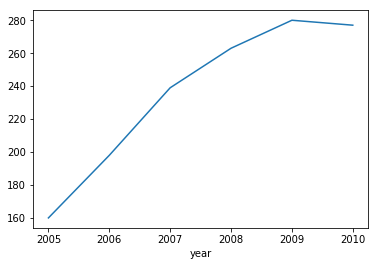

In [64]:
file.groupby('year').size().plot()

Text(0,0.5,'Number of Case decision coming that year')

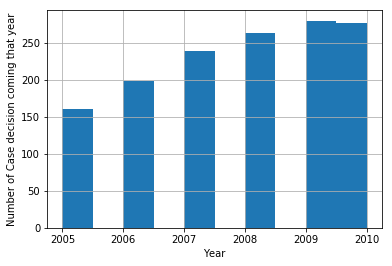

In [258]:
file['year'].hist()
plt.xlabel("Year")
plt.ylabel("Number of Case decision coming that year")

In [55]:
courts_number = pd.DataFrame()
courts_number['Count'] = file.groupby('courtline').agg('size')


In [57]:
courts_number = courts_number.reset_index()

In [58]:
courts_number.columns

Index(['courtline', 'Count'], dtype='object')

In [62]:
courts_number.sort_values('Count', ascending=False)[:5]

,courtline,Count
194,"United States District Court, S.D. New York.",62
120,"United States District Court, E.D. Pennsylvania.",53
162,"United States District Court, N.D. Illinois, E...",46
115,"United States District Court, E.D. Michigan, S...",38
86,"United States District Court, D. New Jersey.",33


In [71]:
All_summary = " ".join(file['summary'])

Joined summary of all rows

In [80]:
file['searchsnippet2'].fillna("", inplace=True)
file['searchsnippet3'].fillna("", inplace=True)
file['searchsnippet4'].fillna("", inplace=True)

Combined Search Snippet and then Joined over all rows

In [81]:
file['searchsnippet_combined'] = file['searchsnippet1'] + file['searchsnippet2']+file['searchsnippet3']+file['searchsnippet4']

In [92]:
All_searchsnippet = " ".join(file['searchsnippet_combined'])

# Word Cloud

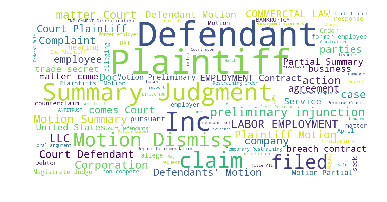

In [91]:
wordcloud_summary = WordCloud(stopwords=STOPWORDS,width=1000, height=500,max_words=100,max_font_size=100, background_color='white').generate(All_summary)

plt.imshow(wordcloud_summary)
plt.axis('off')
plt.show()

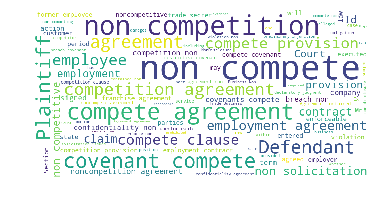

In [106]:
wordcloud_snippet = WordCloud(stopwords=STOPWORDS,width=1000, height=500,max_words=100,max_font_size=100, background_color='white').generate(All_searchsnippet)

plt.imshow(wordcloud_snippet)
plt.axis('off')
plt.show()

# Sentiment Analysis

In [97]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
headers = ['pos','neg','neu','compound']
#print("Name\t",'  pos\t','neg\t','neu\t','compound')
analyzer = SentimentIntensityAnalyzer()
for i in range(file.shape[0]):
    name = file['summary'][i]
    sentences = sent_tokenize(name)
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)

        pos+=vs['pos']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
        compound+=vs['compound']/(len(sentences))

In [101]:
print(pos,neu, neg, compound)

0.144 0.74 0.116 0.1531


In [104]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
headers = ['pos','neg','neu','compound']
#print("Name\t",'  pos\t','neg\t','neu\t','compound')
analyzer = SentimentIntensityAnalyzer()
for i in range(file.shape[0]):
    name = file['searchsnippet_combined'][i]
    sentences = sent_tokenize(name)
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)

        pos+=vs['pos']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
        compound+=vs['compound']/(len(sentences))

In [105]:
print(pos,neu, neg, compound)

0.095 0.905 0.0 0.2732


# Word Fequency

In [131]:
Words_Summary_All = word_tokenize(All_summary)
Words_Summary  = [p_stemmer.stem(w) for w in Words_Summary_All if not w in STOPWORDS and len(w)>1] 
summary_fdist1 = nltk.FreqDist(Words_Summary)

In [132]:
len(Words_Summary_All), len(Words_Summary)

(70375, 40286)

In [277]:
summary_fdist1.most_common(10)

[('motion', 1112),
 ('plaintiff', 1048),
 ("'s", 1026),
 ('defend', 984),
 ('court', 921),
 ('...', 888),
 ('inc.', 474),
 ('file', 445),
 ('thi', 417),
 ('employ', 373)]

In [142]:
Words_Snippet_All = word_tokenize(All_searchsnippet)
Words_Snippet  = [w.lower() for w in Words_Snippet_All if not w in STOPWORDS and len(w)>1] 
snippet_fdist1 = nltk.FreqDist(Words_Snippet)

In [278]:
snippet_fdist1.most_common(10)

[('...', 6467),
 ('non-', 2138),
 ('compete', 1907),
 ('agreement', 1797),
 ('competition', 826),
 ("'s", 759),
 ('covenant', 652),
 ('employment', 506),
 ('the', 482),
 ('agreements', 404)]

# Dispersion Plot

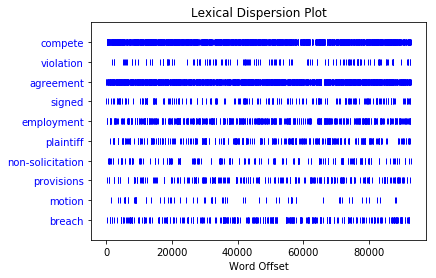

In [167]:
text = nltk.Text([w.lower() for w in Words_Snippet_All])
text.dispersion_plot(['compete','violation','agreement','signed','employment','plaintiff','non-solicitation','provisions','motion','breach'])

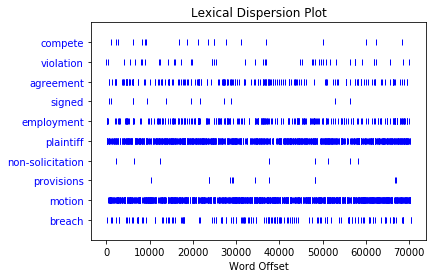

In [166]:
text = nltk.Text([w.lower() for w in Words_Summary_All])
text.dispersion_plot(['compete','violation','agreement','signed','employment','plaintiff','non-solicitation','provisions','motion','breach'])

# Creating Summary

In [168]:
import gensim.summarization

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [169]:
summaryOfSummary = gensim.summarization.summarize(All_summary, word_count=100) 

In [170]:
summaryOfSummary

"Based on the record and the oral argument in this case, the Court will grant the plaintiff's motion with respect to Defendant Porter's alleged violation of the non-compete agreement and trademark infringement, and will...\nThis matter comes before the Court on three motions: 1) Defendants Richards Manufacturing Company and Glenn Luzzi (collectively, Richards) move for partial summary judgment, pursuant to Fed.R.Civ.P. 56; 2) Plaintiff Thomas & Betts Corporation (T & B) cross-moves to strike parts of the motion and certain evidence; and 3)..."

In [171]:
summaryOfSnippet = gensim.summarization.summarize(All_searchsnippet, word_count=100) 

In [279]:
summaryOfSnippet

"...to his promotion to Area Manager, Woolum signed an Optionee Non- Competition Agreement (Agreement) in exchange for stock options and continued employment......Complaint alleges the following claims: 1) Woolum has breached his non- compete Agreement by, among other things, soliciting MedQuest employees and forming......the Court to restrain 1) Woolum from violating the restrictive covenants in his Optionee Non- Competition Agreement, 2) North Bay and Woolum from misappropriating MedQuest's trade secrets, 3) North Bay from tortiously interfering with Woolum's non- compete Agreement, and 4) North Bay and Woolum from tortiously interfering......address its validity at the outset."

# Topic Modelling

In [172]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [173]:
Summary_texts_word = [[word for word in story.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word.lower() == 'slate']
        for story in file['summary']]

In [175]:
dictionary = corpora.Dictionary(Summary_texts_word) #(word_id,frequency) pairs
corpus_Summary = [dictionary.doc2bow(text) for text in Summary_texts_word] #(word_id,freq) pairs by sentence

In [259]:
num_topics = 3 #The number of topics that should be generated
passes = 10

In [282]:
lda = LdaModel(corpus_Summary,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

In [283]:
lda.show_topic(1,topn=10)

[('employment', 0.02046224),
 ('labor', 0.017422048),
 ('law', 0.012419985),
 ('trade', 0.009979171),
 ('commercial', 0.009574136),
 ('business', 0.007220674),
 ('agreement', 0.0071021924),
 ('judgment', 0.0063480213),
 ('plaintiffs', 0.0062927417),
 ('employee', 0.006157848)]

In [187]:

import pyLDAvis.gensim 

In [284]:
vis = pyLDAvis.gensim.prepare(lda, corpus_Summary, dictionary)
pyLDAvis.display(vis, local=True)

# Clustering

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [194]:
tfidfVectorizer = TfidfVectorizer(input="content")

In [195]:
tfid_train = tfidfVectorizer.fit_transform(file['summary'])

In [196]:
from sklearn.cluster import KMeans

In [285]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(tfid_train)

In [286]:
Predicted_Clusters = kmeans.predict(tfid_train)

In [287]:
np.unique(Predicted_Clusters, return_counts=True)

(array([0, 1, 2]), array([658, 142, 617], dtype=int64))

In [288]:
kmeans.cluster_centers_

array([[0.00025473, 0.00340199, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00069294, 0.0009621 , 0.00036237, ..., 0.00147875, 0.00112297,
        0.00031852]])

In [289]:
file['Cluster'] = pd.Series(Predicted_Clusters)

In [290]:
cluster1 =[]
cluster1.append([i for i in range(file.shape[0]) if Predicted_Clusters[i]==0])

In [291]:
cluster2 =[]
cluster2.append([i for i in range(file.shape[0]) if Predicted_Clusters[i]==1])

In [292]:
cluster3 =[]
cluster3.append([i for i in range(file.shape[0]) if Predicted_Clusters[i]==2])

In [293]:
df = pd.DataFrame(tfid_train.toarray())

In [294]:
tfid_train.toarray().shape

(1417, 5947)

# Visualization of clusters in 2 D

In [238]:
from sklearn.manifold import TSNE

In [239]:
from matplotlib.ticker import NullFormatter

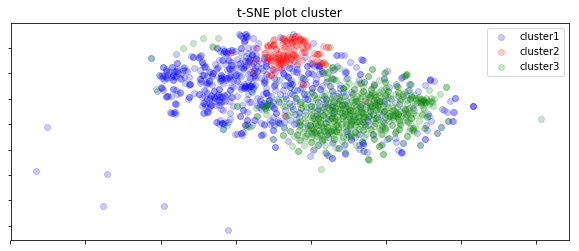

In [295]:
def test_tsne(data, ax=None, title='t-SNE'):
      # Run PCA and transform data in 2 Dimensions
    tsne = TSNE(n_components=2, init='pca')
    transData = tsne.fit_transform(data)

    # Create scatter plot for train and test
    
    for name, idx, c in zip(["cluster1", "cluster2", "cluster3"], [cluster1, cluster2, cluster3],['b','r','g']):
        ax.scatter(transData[idx, 0], transData[idx, 1], label=name, alpha=0.2, color=c)
        ax.set_title(title)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
    ax.legend()        
    

# Create Plot outline    
_, axes = plt.subplots(1, 1, figsize=(10, 4))


test_tsne(df, axes,title='t-SNE plot cluster')

plt.axis('tight')
plt.show()